In [1]:
import numpy as np                                    #To import numpy

In [2]:
import pandas as pd                                   #To import pandas

In [3]:
#This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. 
#It contains 76 attributes, including the predicted attribute, 
#but all published experiments refer to using a subset of 14 of them. 
#The "target" field refers to the presence of heart disease in the patient. 
#It is integer valued 0 =disease and 1 = no disease.
#1-Male,0-female

In [4]:
#age
#sex-1-male,0-female
#chest pain type (4 values):(0,1,2,3),0-no pain,1-little pain,2-severe pain,3-pain wch is not related to exercise
#resting blood pressure-normal:less than 120
#serum cholestoral in mg/dl-normal:less than 200
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2),0-normal
#maximum heart rate achieved-(normal:60-100)
#exercise induced angina
#0: No exercise-induced angina (the patient did not experience angina during the exercise stress test).
#1: Exercise-induced angina (the patient experienced angina during the exercise stress test).
#oldpeak = ST depression induced by exercise relative to rest-higher ST segment-higher old peak
#slope:1-upsloping(insufficient blood supply to the heart muscle),2-flat(no significant upward or downward slope),3-downsloping(a lack of blood flow to the heart muscle)
#ca:0,1,2,3:
#ca = 0: This indicates that there is no significant narrowing or stenosis in any of the major coronary arteries.
#ca = 1: It represents that one major coronary artery has significant narrowing or stenosis.
#ca = 2: This value signifies that two major coronary arteries are affected.
#ca = 3: It means that three major coronary arteries have significant stenosis or narrowing.
#thal(thallium stress test:to evaluate blood flow): 1 = normal; 2 = fixed defect; 3 = reversable defect


In [5]:
a=pd.read_csv("heart.csv")                           # To load data
a


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
a.drop_duplicates(inplace=True)
a                                                                            # To remove duplicate values from original data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
a.info()                                                       # To get information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [8]:
a.describe()                                                     # To describe set(like max,min,mean,count.....)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
a.shape                                                               # To find number of rows and columns.

(302, 14)

In [10]:
a.count()                                                         # Count the no of each columns and rows

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

In [11]:
a.isnull().sum()                                                         # Shows that there are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
a.isnull().sum().sum()                                                         # Shows the total no of null positions

0

In [13]:
import matplotlib                                  # To import matplotlib

In [14]:
import matplotlib.pyplot as plt                    # To import matplotlib as pyplot

In [15]:
import seaborn                                     # To import seaborn

In [16]:
import seaborn as sns                              # To import seaborn as sns

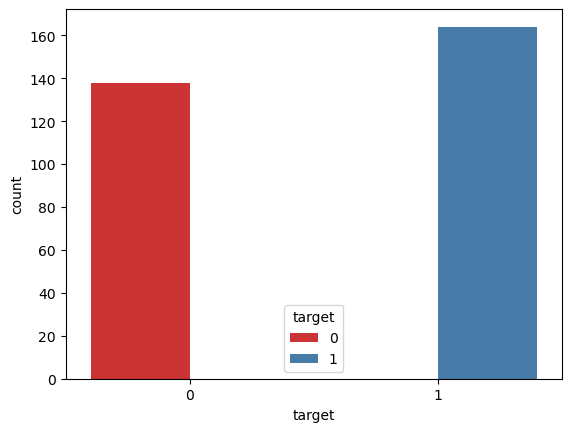

In [17]:
sns.countplot(x="target",hue="target",data=a,palette="Set1")                #No of persons affected with disease is less
plt.show()

In [18]:
#disesase

In [19]:
demo=a.loc[:,"target"]==0           #(0)                           #To load only datas of 'target',equal to 0
demo

0       True
1       True
2       True
3       True
4       True
       ...  
723    False
733    False
739     True
843     True
878     True
Name: target, Length: 302, dtype: bool

In [20]:
unhealthy=a[demo]                                             #To display all the rows and columns of 'unhealthy people'
unhealthy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [22]:
unhealthybp=unhealthy.loc[0:138,"trestbps"]                                #To get 'bp' values of unhealthy people                       
unhealthybp

0      125
1      140
2      145
3      148
4      138
      ... 
116    130
117    120
122    145
124    120
135    170
Name: trestbps, Length: 61, dtype: int64

In [23]:
unhealthybpmean=unhealthybp.mean()                          #To get mean of the above condition
unhealthybpmean

136.21311475409837

In [24]:
unhealthychol=unhealthy.loc[0:138,"chol"]                       #To get 'chol' values of unhealthy people                       
unhealthychol

0      212
1      203
2      174
3      203
4      294
      ... 
116    254
117    177
122    282
124    260
135    225
Name: chol, Length: 61, dtype: int64

In [25]:
unhealthycholmean=unhealthychol.mean()                                 #'chol' mean
unhealthycholmean

245.24590163934425

In [26]:
unhealthyecg=unhealthy.loc[0:138,"restecg"]                             #To get 'restecg ' values of unhealthy people                            
unhealthyecg

0      1
1      0
2      1
3      1
4      1
      ..
116    0
117    0
122    0
124    1
135    0
Name: restecg, Length: 61, dtype: int64

In [27]:
unhealthyecgmean=unhealthyecg.mean()                                   #To get mean of 'ecg'
unhealthyecgmean

0.4918032786885246

In [28]:
unhealthybs=unhealthy.loc[0:138,"fbs"]                                  #To get 'fbs' values of unhealthy people                          
unhealthybs

0      0
1      1
2      0
3      0
4      1
      ..
116    0
117    0
122    0
124    0
135    1
Name: fbs, Length: 61, dtype: int64

In [29]:
unhealthybsmean=unhealthybs.mean()                                     #To get mean of 'fbs'
unhealthybsmean

0.21311475409836064

In [30]:
unhealthythalach=unhealthy.loc[0:138,"thalach"]                           #To get 'thalach' values of unhealthy people                          
unhealthythalach

0      168
1      155
2      125
3      161
4      106
      ... 
116    147
117    120
122    142
124    140
135    146
Name: thalach, Length: 61, dtype: int64

In [31]:
unhealthythalachmean=unhealthythalach.mean()                            #To get mean of 'thalach '
unhealthythalachmean

140.88524590163934

In [32]:
unhealthycp=unhealthy.loc[0:138,"cp"]                                           #To get 'cp' values of unhealthy people                        
unhealthycp

0      0
1      0
2      0
3      0
4      0
      ..
116    0
117    0
122    0
124    0
135    0
Name: cp, Length: 61, dtype: int64

In [33]:
unhealthycpmean=unhealthycp.mean()                                    #To get the mean of 'cp'
unhealthycpmean

0.4262295081967213

In [34]:
unhealthyexang=unhealthy.loc[0:138,"exang"]                              #To get 'exang' values of unhealthy people                                                                                                                                                                                                             
unhealthyexang

0      0
1      1
2      1
3      0
4      0
      ..
116    0
117    1
122    1
124    1
135    1
Name: exang, Length: 61, dtype: int64

In [35]:
unhealthyexangmean=unhealthyexang.mean()                               #To get mean of 'exang'
unhealthyexangmean

0.5901639344262295

In [36]:
unhealthyop=unhealthy.loc[0:138,"oldpeak"]                            #To get 'oldpeak' values of unhealthy people                         
unhealthyop

0      1.0
1      3.1
2      2.6
3      0.0
4      1.9
      ... 
116    1.4
117    2.5
122    2.8
124    3.6
135    2.8
Name: oldpeak, Length: 61, dtype: float64

In [37]:
unhealthyopmean=unhealthyop.mean()                                   #To get the mean of 'oldpeak'
unhealthyopmean

1.819672131147541

In [38]:
unhealthyslope=unhealthy.loc[0:138,"slope"]                              #To get 'slope' values of unhealthy people                        
unhealthyslope

0      2
1      0
2      0
3      2
4      1
      ..
116    1
117    1
122    1
124    1
135    1
Name: slope, Length: 61, dtype: int64

In [39]:
unhealthyslopemean=unhealthyslope.mean()                               #mean 0f 'slope'
unhealthyslopemean

1.1311475409836065

In [40]:
unhealthyca=unhealthy.loc[0:138,"ca"]                                #'ca' of unhealthy                        
unhealthyca

0      2
1      0
2      0
3      1
4      3
      ..
116    1
117    0
122    2
124    1
135    2
Name: ca, Length: 61, dtype: int64

In [41]:
unhealthycamean=unhealthyca.mean()                                        #mean of 'ca'
unhealthycamean

1.0819672131147542

In [42]:
unhealthythal=unhealthy.loc[0:138,"thal"]                                 #'thal'of unhealthy                        
unhealthythal

0      3
1      3
2      3
3      3
4      2
      ..
116    3
117    3
122    3
124    3
135    1
Name: thal, Length: 61, dtype: int64

In [43]:
unhealthythalmean=unhealthythal.mean()                               #mean of 'thal'
unhealthythalmean

2.459016393442623

In [44]:
#No Disease

In [45]:
demo=a.loc[:,"target"]==1             #(1)                           #To load only datas of 'target', equal to 1
demo

0      False
1      False
2      False
3      False
4      False
       ...  
723     True
733     True
739    False
843    False
878    False
Name: target, Length: 302, dtype: bool

In [46]:
healthy=a[demo]                                              # To display all rows and columns of unhealthy people(target=1)
healthy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
708,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
719,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [47]:
healthybp=unhealthy.loc[0:138,"trestbps"]                                     #'trestbps' of healthy                          
healthybp

0      125
1      140
2      145
3      148
4      138
      ... 
116    130
117    120
122    145
124    120
135    170
Name: trestbps, Length: 61, dtype: int64

In [48]:
healthybpmean=healthybp.mean()                                     #mean of 'trestbps'
healthybpmean

136.21311475409837

In [49]:
healthychol=healthy.loc[0:138,"chol"]                                     #'chol' of healthy                        
healthychol

5      248
10     149
12     210
16     308
18     244
19     211
21     223
22     208
23     252
24     209
26     233
34     196
36     213
37     271
38     263
40     360
41     258
44     342
45     226
46     203
48     278
50     283
52     175
56     193
57     245
60     204
63     212
66     197
68     215
75     257
76     255
78     201
85     220
90     267
91     209
94     208
95     236
96     303
99     197
100    213
101    126
102    309
104    186
111    226
119    295
123    417
125    240
126    302
128    223
129    192
131    256
137    325
Name: chol, dtype: int64

In [50]:
healthycholmean=healthychol.mean()                                                    #mean of 'chol'
healthycholmean

240.23076923076923

In [51]:
healthybs=healthy.loc[0:138,"fbs"]                                                 #'fbs' of healthy                       
healthybs

5      0
10     0
12     0
16     0
18     0
19     1
21     0
22     0
23     0
24     0
26     0
34     0
36     0
37     0
38     0
40     0
41     0
44     0
45     0
46     0
48     0
50     1
52     0
56     0
57     0
60     0
63     1
66     1
68     0
75     0
76     1
78     0
85     0
90     0
91     0
94     1
95     0
96     0
99     0
100    0
101    1
102    0
104    0
111    0
119    0
123    1
125    0
126    0
128    0
129    0
131    0
137    0
Name: fbs, dtype: int64

In [52]:
healthybsmean=healthybs.mean()                             #mean of 'fbs'
healthybsmean

0.15384615384615385

In [53]:
healthyecg=healthy.loc[0:138,"restecg"]                                  #'ecg' of healthy                          
healthyecg

5      0
10     1
12     1
16     0
18     1
19     0
21     1
22     0
23     0
24     1
26     1
34     1
36     0
37     0
38     1
40     0
41     0
44     1
45     1
46     1
48     0
50     0
52     1
56     0
57     0
60     0
63     1
66     0
68     1
75     0
76     1
78     1
85     1
90     0
91     1
94     0
95     0
96     0
99     2
100    1
101    1
102    1
104    0
111    0
119    1
123    0
125    1
126    0
128    1
129    1
131    0
137    1
Name: restecg, dtype: int64

In [54]:
healthyecgmean=healthyecg.mean()                                    #mean of 'ecg'
healthyecgmean

0.5384615384615384

In [55]:
healthyhr=healthy.loc[0:138,"thalach"]                                  #'thalach' of healthy                         
healthyhr

5      122
10     125
12     192
16     142
18     162
19     165
21     142
22     148
23     172
24     173
26     179
34     163
36     125
37     182
38     105
40     151
41     147
44     166
45     178
46     132
48     152
50     162
52     173
56     162
57     180
60     202
63     157
66     152
68     170
75     156
76     175
78     158
85     170
90     167
91     163
94     140
95     152
96     159
99     116
100    165
101    173
102    156
104    190
111    111
119    162
123    157
125    171
126    151
128    169
129    148
131    149
137    154
Name: thalach, dtype: int64

In [56]:
healthyhrmean=healthyhr.mean()                                          #mean of 'thalach'
healthyhrmean

157.55769230769232

In [57]:
healthyexang=healthy.loc[0:138,"exang"]                                      #'exang' of healthy                          
healthyexang

5      0
10     0
12     0
16     0
18     0
19     0
21     0
22     1
23     0
24     0
26     1
34     0
36     1
37     0
38     1
40     0
41     0
44     0
45     0
46     0
48     0
50     0
52     0
56     0
57     0
60     0
63     0
66     0
68     0
75     0
76     0
78     0
85     0
90     0
91     0
94     0
95     1
96     0
99     0
100    0
101    0
102    0
104    0
111    1
119    0
123    0
125    0
126    0
128    0
129    0
131    0
137    1
Name: exang, dtype: int64

In [58]:
healthyexangmean=healthyexang.mean()                                                #mean of 'exang'
healthyexangmean

0.1346153846153846

In [59]:
healthyop=healthy.loc[0:138,"oldpeak"]                                           #'oldpeak' of healthy                         
healthyop

5      1.0
10     1.6
12     0.7
16     1.5
18     1.1
19     0.0
21     0.3
22     3.0
23     0.0
24     0.0
26     0.4
34     0.0
36     1.4
37     0.0
38     0.2
40     0.8
41     0.4
44     1.2
45     0.0
46     0.0
48     0.0
50     1.0
52     0.0
56     1.9
57     0.2
60     0.0
63     1.6
66     1.2
68     0.0
75     0.0
76     0.0
78     0.8
85     0.0
90     0.0
91     0.0
94     0.0
95     0.2
96     0.0
99     1.1
100    0.2
101    0.2
102    0.0
104    0.0
111    0.0
119    0.0
123    0.8
125    0.9
126    0.4
128    0.0
129    0.4
131    0.5
137    0.0
Name: oldpeak, dtype: float64

In [60]:
healthyopmean=healthyop.mean()                                           #mean of 'oldpoeak'
healthyopmean

0.4807692307692308

In [61]:
healthyslope=healthy.loc[0:138,"slope"]                                          #'slope' of healthy                          
healthyslope

5      1
10     1
12     2
16     2
18     2
19     2
21     2
22     1
23     2
24     1
26     2
34     2
36     2
37     2
38     1
40     2
41     1
44     2
45     2
46     1
48     1
50     2
52     2
56     1
57     1
60     2
63     2
66     0
68     2
75     2
76     2
78     2
85     2
90     2
91     2
94     2
95     1
96     2
99     1
100    1
101    2
102    2
104    1
111    2
119    2
123    2
125    2
126    1
128    2
129    1
131    2
137    2
Name: slope, dtype: int64

In [62]:
healthyslopemean=healthyslope.mean()                                              #mean of 'slope'
healthyslopemean

1.6538461538461537

In [63]:
healthyca=healthy.loc[0:138,"ca"]                                                    #'ca' of healthy                         
healthyca

5      0
10     0
12     0
16     1
18     0
19     0
21     2
22     0
23     0
24     0
26     0
34     0
36     1
37     0
38     1
40     0
41     0
44     0
45     0
46     0
48     1
50     0
52     4
56     0
57     0
60     0
63     0
66     0
68     0
75     0
76     2
78     1
85     0
90     0
91     0
94     0
95     0
96     1
99     0
100    0
101    1
102    0
104    0
111    0
119    0
123    1
125    0
126    0
128    4
129    0
131    0
137    0
Name: ca, dtype: int64

In [64]:
healthycamean=healthyca.mean()                                                             #mean of 'ca'
healthycamean

0.38461538461538464

In [69]:
healthythal=healthy.loc[0:138,"thal"]                                             #'thal' of healthy                         
healthythal

5      2
10     2
12     2
16     2
18     2
19     2
21     2
22     2
23     2
24     2
26     2
34     2
36     2
37     2
38     3
40     2
41     3
44     2
45     2
46     1
48     2
50     2
52     2
56     3
57     2
60     2
63     2
66     2
68     2
75     2
76     2
78     2
85     2
90     2
91     2
94     2
95     2
96     2
99     2
100    2
101    3
102    3
104    1
111    3
119    2
123    2
125    2
126    2
128    2
129    1
131    2
137    2
Name: thal, dtype: int64

In [70]:
healthythalmean=healthythal.mean()                                           #mean of 'thal'
healthythalmean

2.0576923076923075

In [71]:
healthycp=healthy.loc[0:138,"cp"]                                             #'cp' of healthy                         
healthycp

5      0
10     0
12     1
16     2
18     1
19     2
21     0
22     0
23     2
24     2
26     2
34     2
36     3
37     0
38     0
40     2
41     2
44     1
45     0
46     1
48     2
50     3
52     2
56     3
57     1
60     1
63     2
66     2
68     2
75     2
76     2
78     1
85     1
90     2
91     0
94     1
95     0
96     0
99     2
100    2
101    2
102    1
104    3
111    0
119    1
123    2
125    3
126    0
128    2
129    0
131    2
137    0
Name: cp, dtype: int64

In [72]:
healthycpmean=healthycp.mean()                                       #mean of 'cp'
healthycpmean

1.3461538461538463

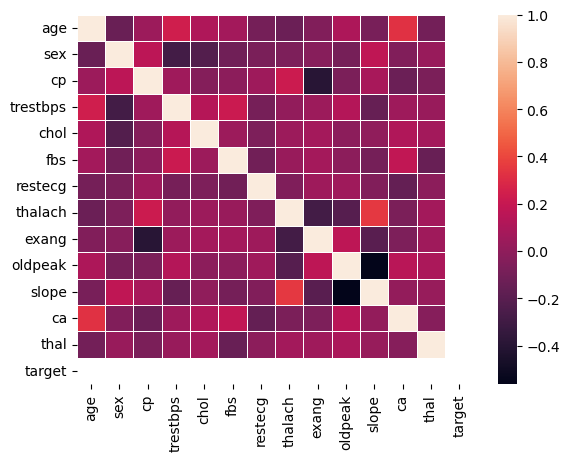

In [109]:
sns.heatmap(unhealthy.corr(),cbar=True,linewidth=0.5)                               #Unhealthy
plt.show()

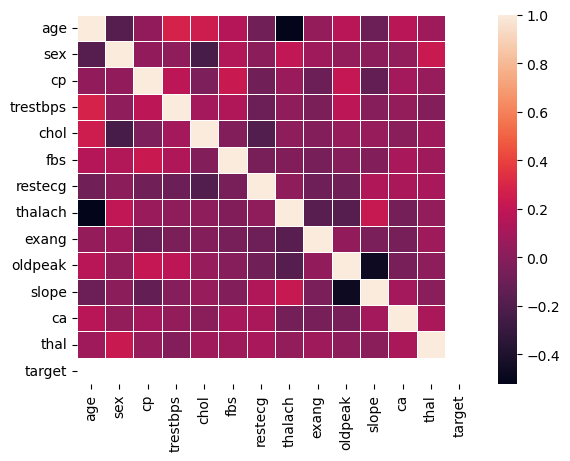

In [110]:
sns.heatmap(healthy.corr(),cbar=True,linewidth=0.5)                                    #Healthy
plt.show()

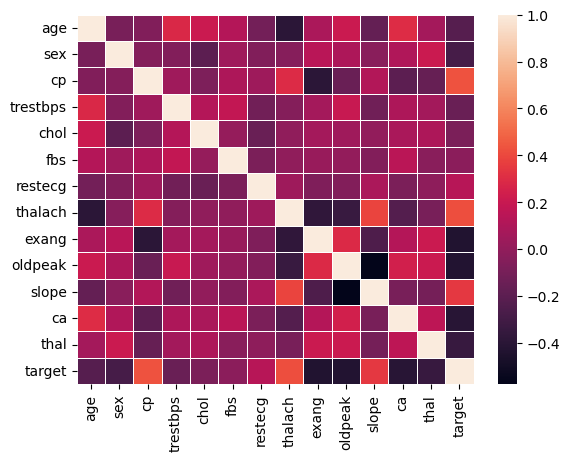

In [111]:
sns.heatmap(a.corr(),cbar=True,linewidth=0.5)                                    #data=a
plt.show()

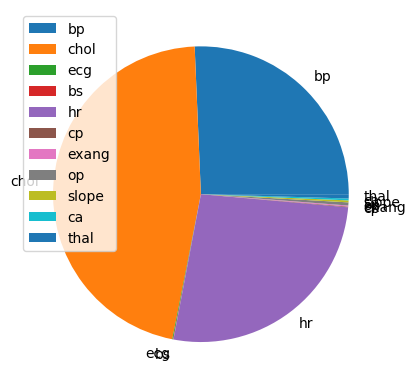

In [79]:
x=np.array([136.21311475409837,245.24590163934425,0.4918032786885246,0.21311475409836064,140.88524590163934,0.4262295081967213,0.5901639344262295,1.819672131147541,1.1311475409836065,1.0819672131147542,2.459016393442623])
y=["bp","chol","ecg","bs","hr","cp","exang","op","slope","ca","thal"]
plt.pie(x,labels=y)                                                                                #Unhealthy
plt.legend()                                            
plt.show()

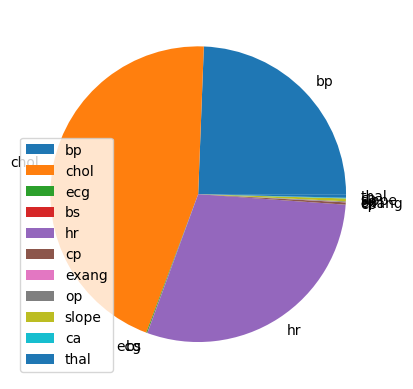

In [80]:
x=np.array([130.5,240.23076923076923,0.5384615384615384,0.15384615384615385,157.55769230769232,1.3461538461538463,0.1346153846153846,0.4807692307692308,1.6538461538461537,0.38461538461538464,2.0576923076923075])
y=["bp","chol","ecg","bs","hr","cp","exang","op","slope","ca","thal"]                               #Healthy
plt.pie(x,labels=y)
plt.legend()                                               
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more cp-people without disease

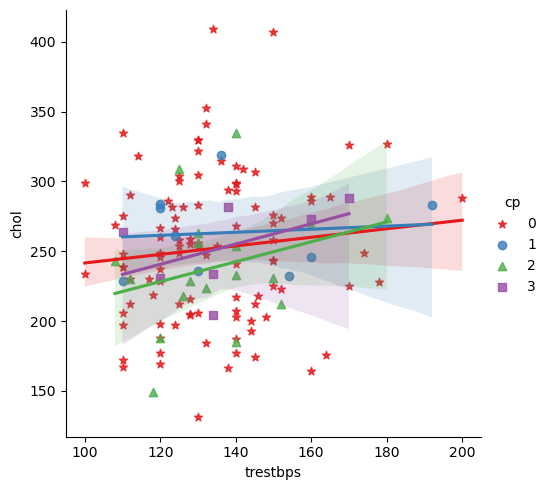

In [81]:
sns.lmplot(x="trestbps",y="chol",hue="cp",data=unhealthy,palette="Set1",markers=["*","o","^",","]) #normalbp-120,chol-200
plt.show()

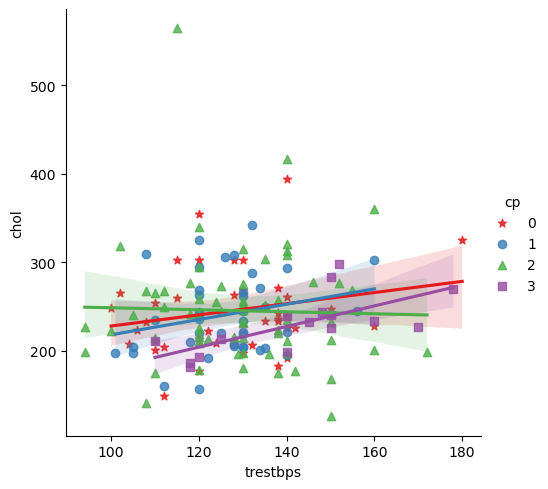

In [82]:
sns.lmplot(x="trestbps",y="chol",hue="cp",data=healthy,palette="Set1",markers=["*","o","^",","])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more fbs-people with disease

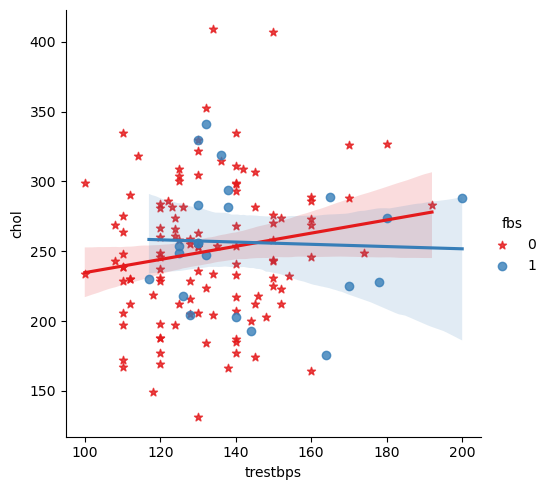

In [83]:
sns.lmplot(x="trestbps",y="chol",hue="fbs",data=unhealthy,palette="Set1",markers=["*","o"])
plt.show()

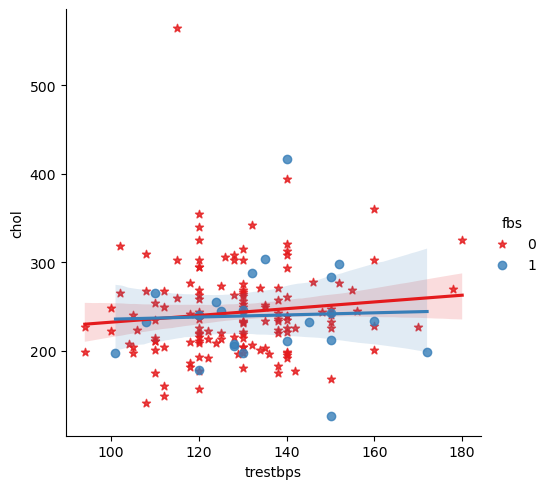

In [84]:
sns.lmplot(x="trestbps",y="chol",hue="fbs",data=healthy,palette="Set1",markers=["*","o"])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more restecg-people without disease

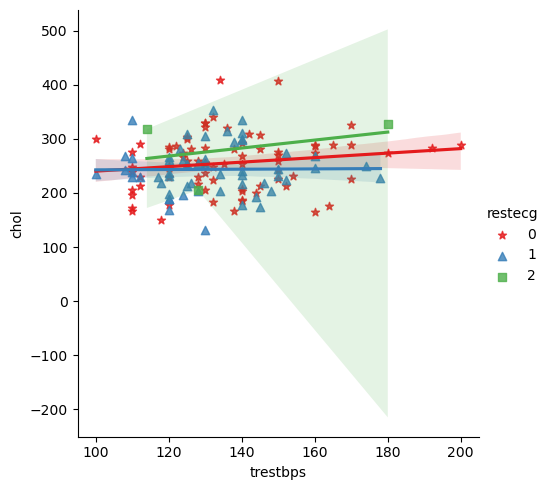

In [85]:
sns.lmplot(x="trestbps",y="chol",hue="restecg",data=unhealthy,palette="Set1",markers=["*","^",","])
plt.show()

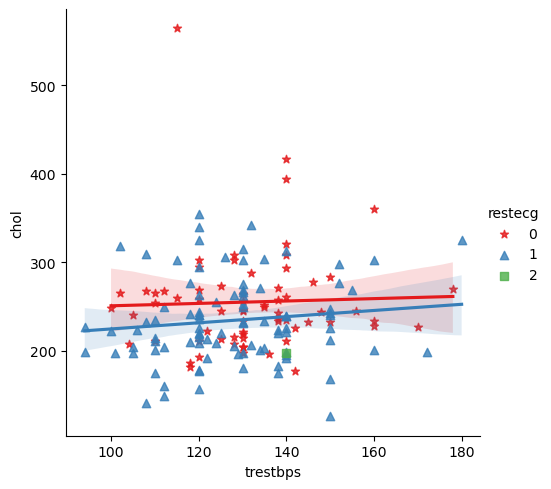

In [86]:
sns.lmplot(x="trestbps",y="chol",hue="restecg",data=healthy,palette="Set1",markers=["*","^",","])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more exang-people with disease

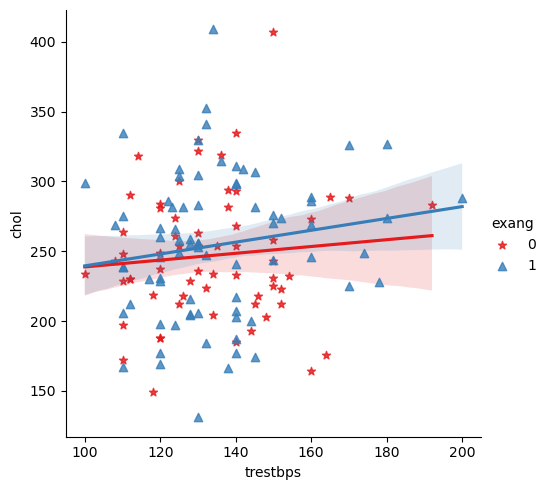

In [87]:
sns.lmplot(x="trestbps",y="chol",hue="exang",data=unhealthy,palette="Set1",markers=["*","^"])
plt.show()

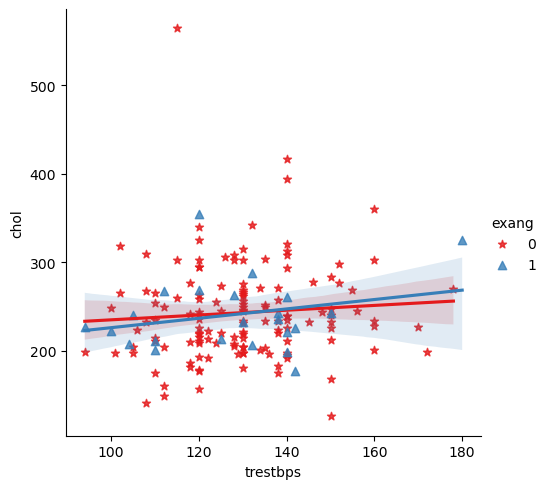

In [88]:
sns.lmplot(x="trestbps",y="chol",hue="exang",data=healthy,palette="Set1",markers=["*","^"])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more slope-people without disease

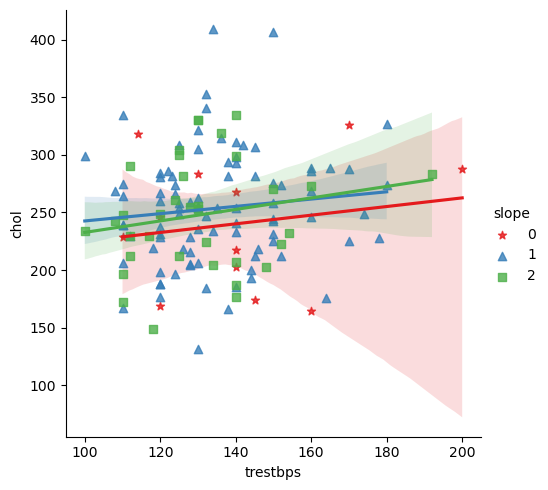

In [89]:
sns.lmplot(x="trestbps",y="chol",hue="slope",data=unhealthy,palette="Set1",markers=["*","^",","])
plt.show()

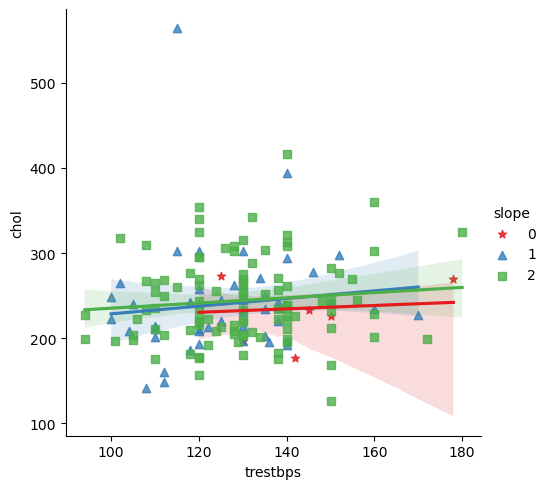

In [90]:
sns.lmplot(x="trestbps",y="chol",hue="slope",data=healthy,palette="Set1",markers=["*","^",","])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more ca-people with disease

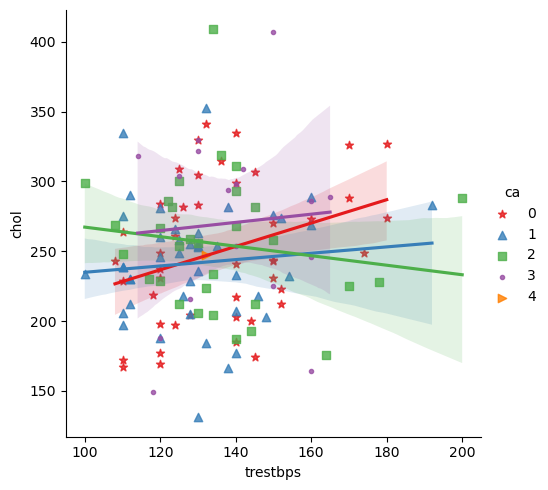

In [91]:
sns.lmplot(x="trestbps",y="chol",hue="ca",data=unhealthy,palette="Set1",markers=["*","^",",",".",">"])
plt.show()

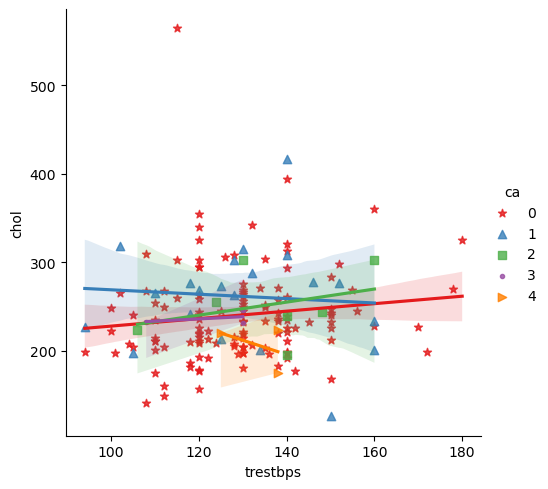

In [92]:
sns.lmplot(x="trestbps",y="chol",hue="ca",data=healthy,palette="Set1",markers=["*","^",",",".",">"])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more trestbps-people with disease,but not much difference while comparing with healthy,more thal-people without disease

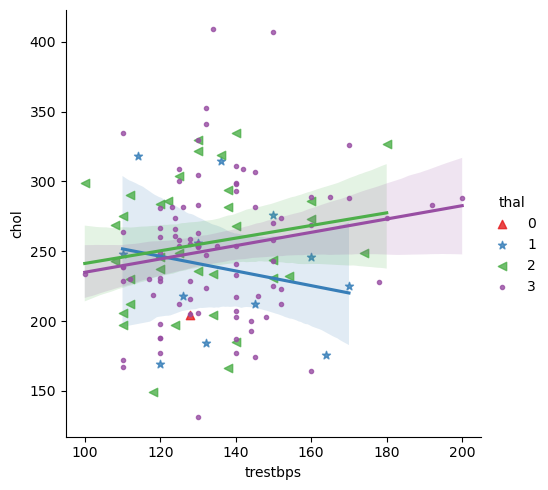

In [93]:
sns.lmplot(x="trestbps",y="chol",hue="thal",data=unhealthy,palette="Set1",markers=["^","*","<","."])
plt.show()

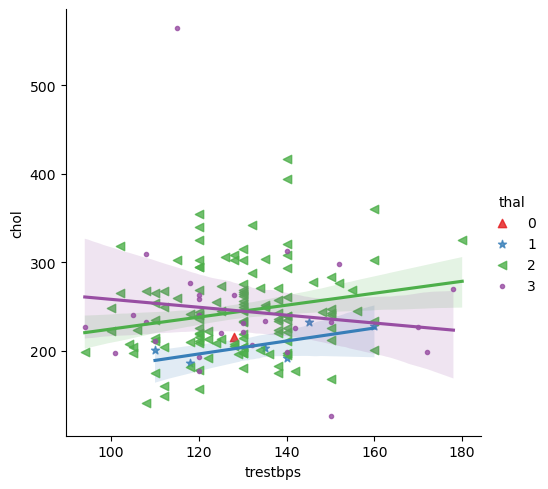

In [94]:
sns.lmplot(x="trestbps",y="chol",hue="thal",data=healthy,palette="Set1",markers=["^","*","<","."])
plt.show()

In [ ]:
#Comparing healthy and unhealthy:more cholestrol-people with disease,more thalach-people without disease,more cp-people without disease

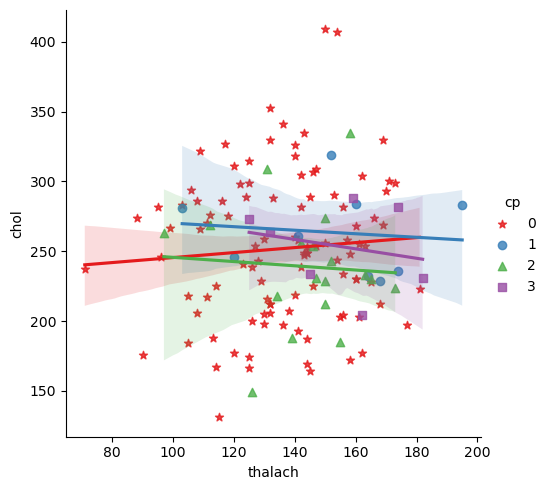

In [95]:
sns.lmplot(x="thalach",y="chol",hue="cp",data=unhealthy,palette="Set1",markers=["*","o","^",","])
plt.show()

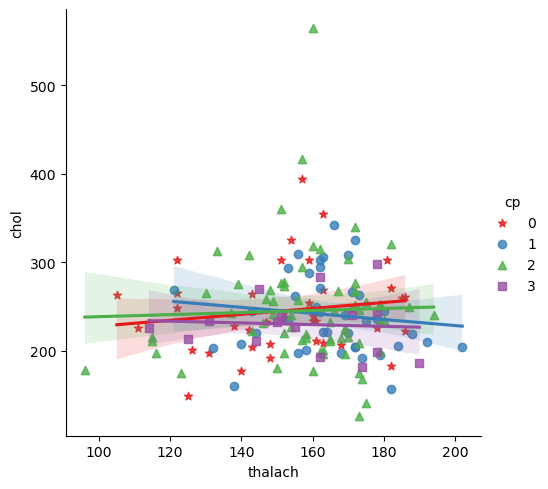

In [96]:
sns.lmplot(x="thalach",y="chol",hue="cp",data=healthy,palette="Set1",markers=["*","o","^",","])
plt.show()

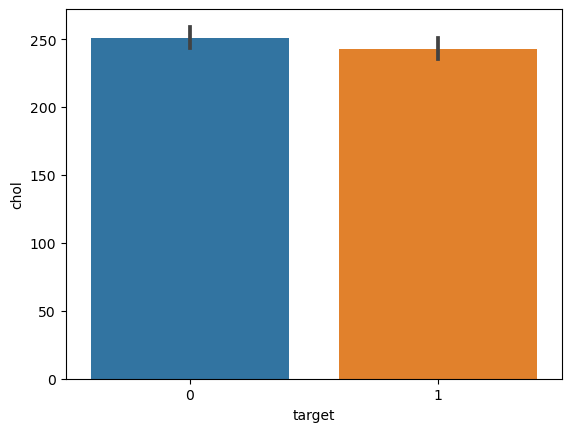

In [97]:
sns.barplot(x="target",y="chol",data=a)                           #More cholestrol-people with disease
plt.show()

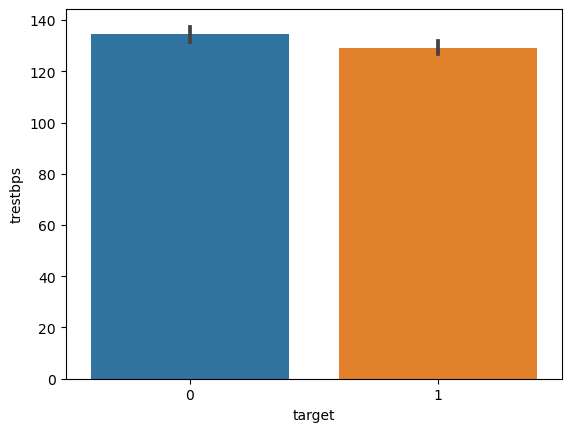

In [98]:
sns.barplot(x="target",y="trestbps",data=a)                                          #More trestbps-people with disease
plt.show()

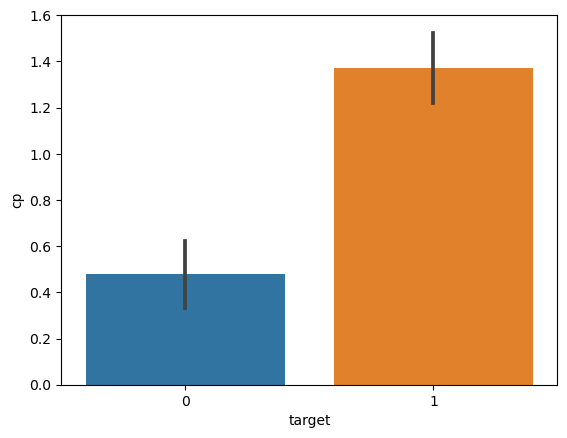

In [99]:
sns.barplot(x="target",y="cp",data=a)                                      #More cp-people without disease
plt.show()

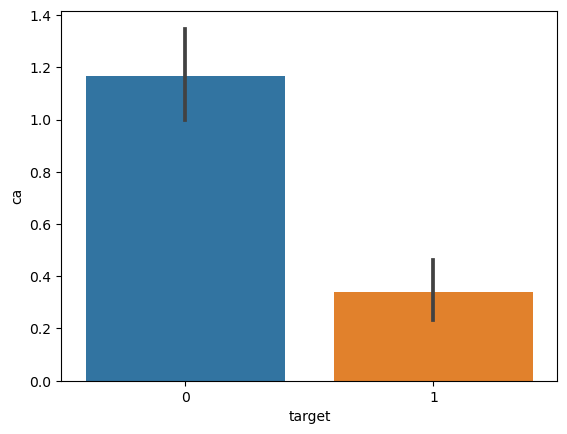

In [100]:
sns.barplot(x="target",y="ca",data=a)                                        #More ca-people with disease
plt.show()

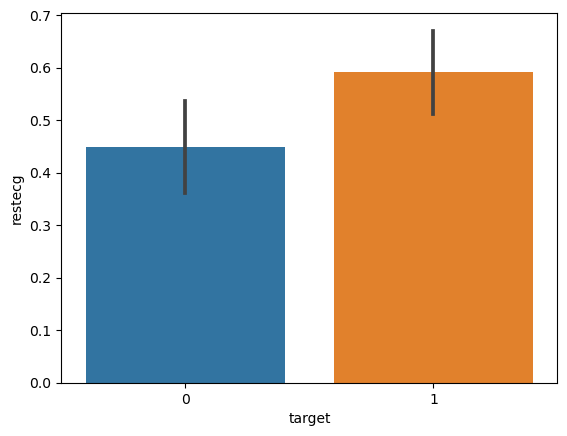

In [101]:
sns.barplot(x="target",y="restecg",data=a)                                     #More restecg-people withot disease
plt.show()

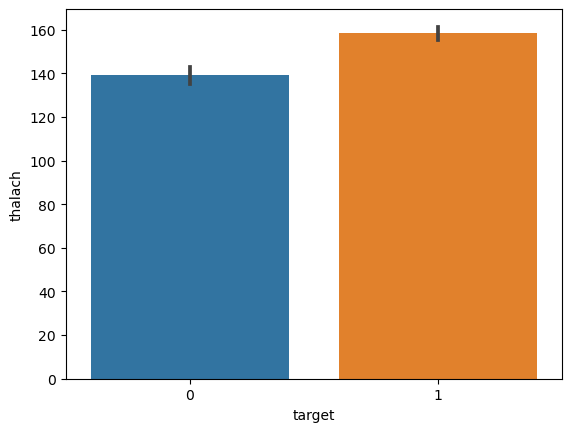

In [102]:
sns.barplot(x="target",y="thalach",data=a)                                        #More thalach-people without disease
plt.show()

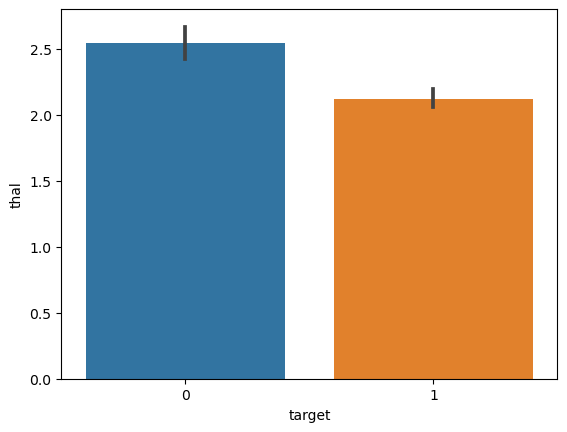

In [103]:
sns.barplot(x="target",y="thal",data=a)                                           #More thal-people with disease
plt.show()

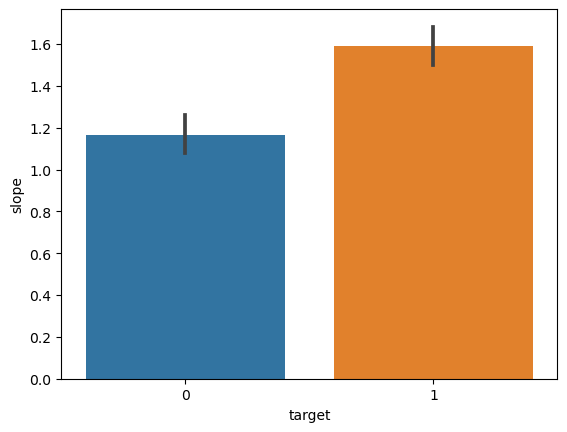

In [104]:
sns.barplot(x="target",y="slope",data=a)                                     #More slope-people without disease
plt.show()

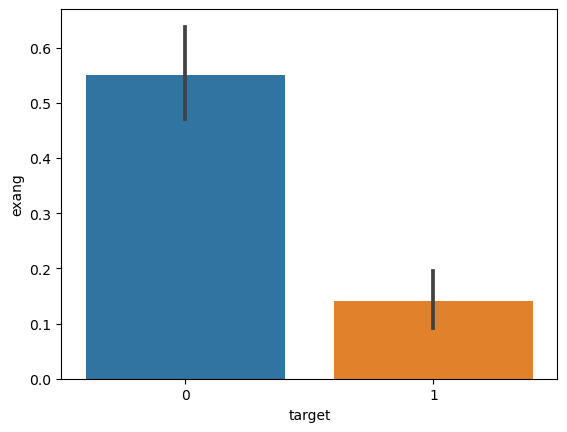

In [105]:
sns.barplot(x="target",y="exang",data=a)                                 #More exang-people with disease
plt.show()

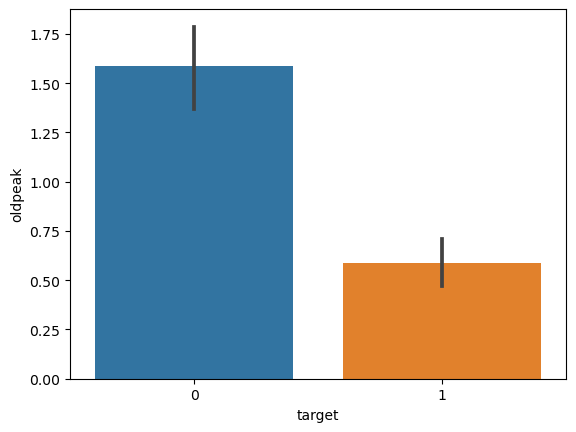

In [106]:
sns.barplot(x="target",y="oldpeak",data=a)                               #More oldpeak-people with disease
plt.show()

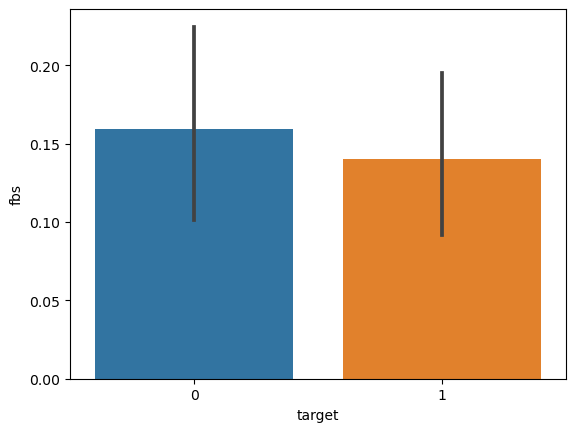

In [107]:
sns.barplot(x="target",y="fbs",data=a)                                      #More fbs-people with disease
plt.show()

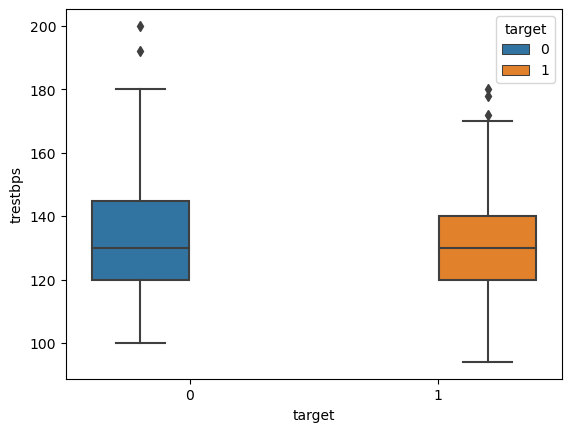

In [114]:
sns.boxplot(x="target",y="trestbps",hue="target",data=a)                                #more 'trestbbs'- with disease
plt.show()

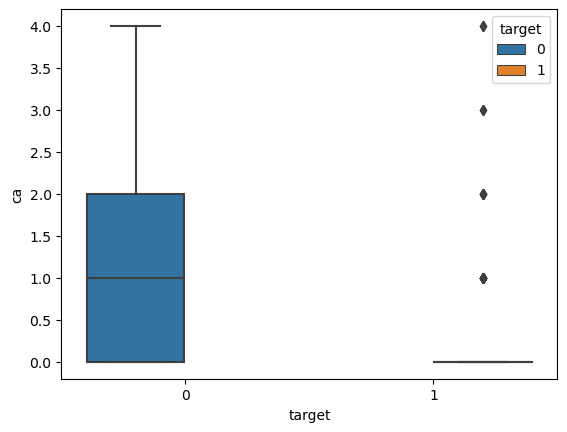

In [115]:
sns.boxplot(x="target",y="ca",hue="target",data=a)                                   #more 'ca'- with disease
plt.show()

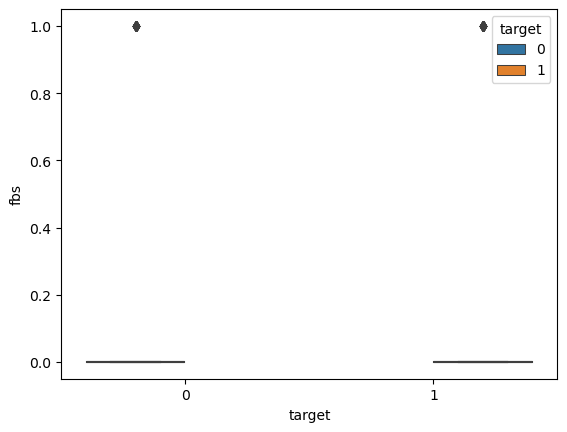

In [116]:
sns.boxplot(x="target",y="fbs",hue="target",data=a)                          #more 'fbs'-with disease(not much difference)
plt.show()

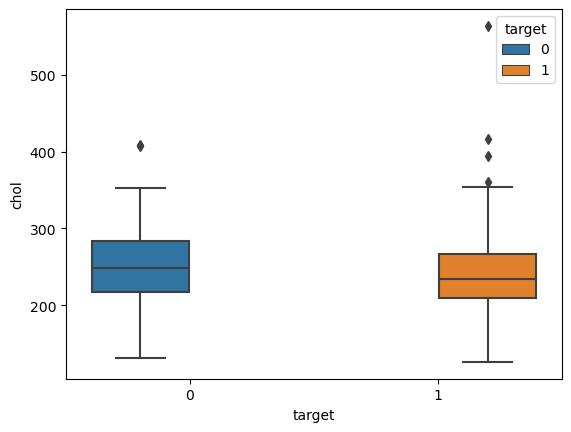

In [117]:
sns.boxplot(x="target",y="chol",hue="target",data=a)                                   #more 'chol'- with disease
plt.show()

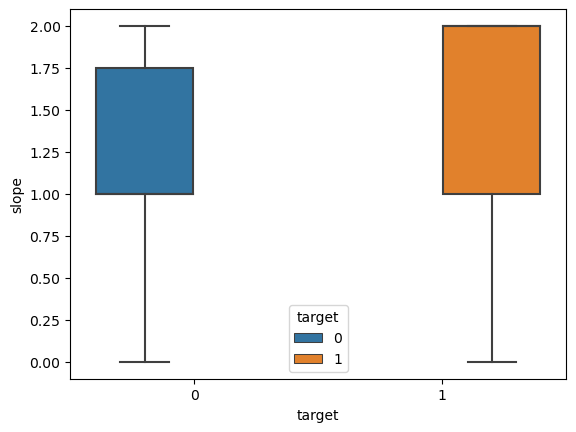

In [118]:
sns.boxplot(x="target",y="slope",hue="target",data=a)                                  #more 'slope'- without disease
plt.show()

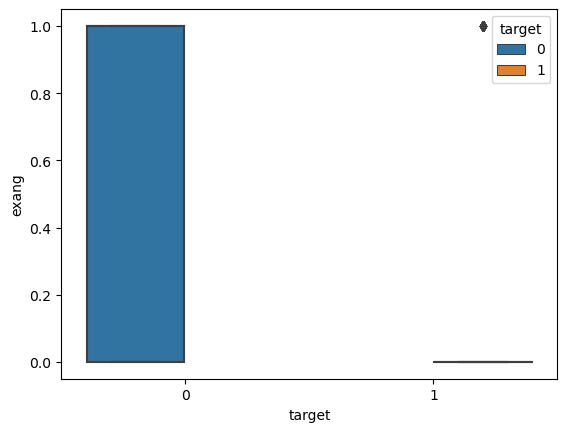

In [119]:
sns.boxplot(x="target",y="exang",hue="target",data=a)                             #more 'exang'- with disease
plt.show()

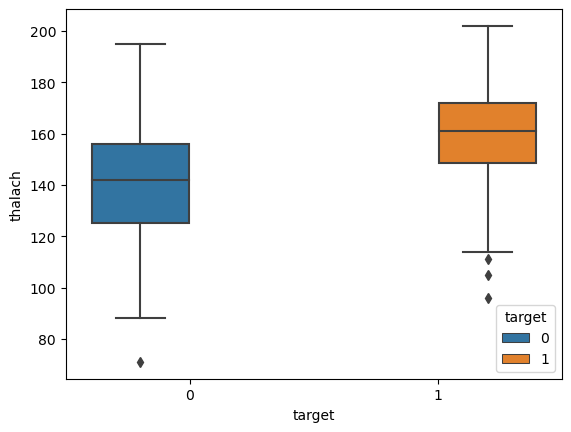

In [120]:
sns.boxplot(x="target",y="thalach",hue="target",data=a)                              #more 'thalach'- without disease
plt.show()

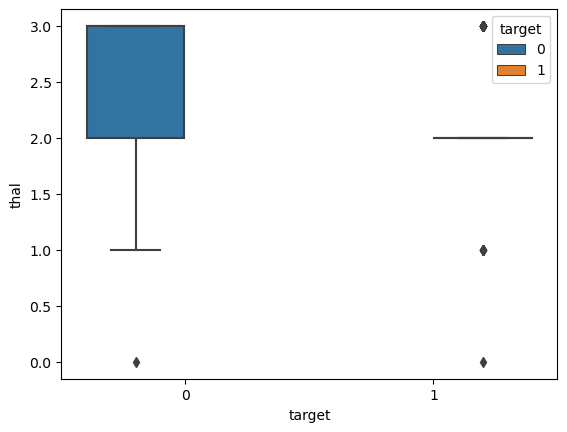

In [121]:
sns.boxplot(x="target",y="thal",hue="target",data=a)                             #more 'thal'- with disease
plt.show()

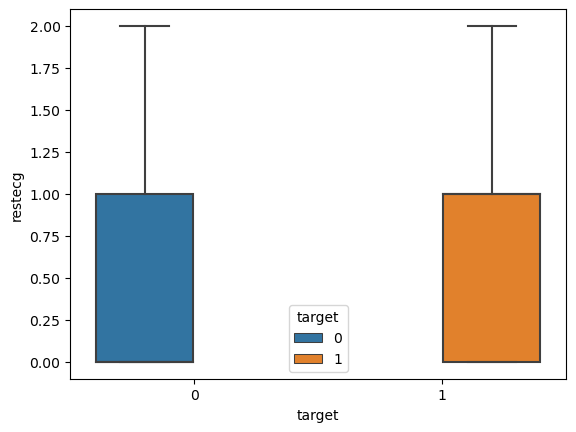

In [122]:
sns.boxplot(x="target",y="restecg",hue="target",data=a)                        #more 'restecg'- comparitevely same
plt.show()

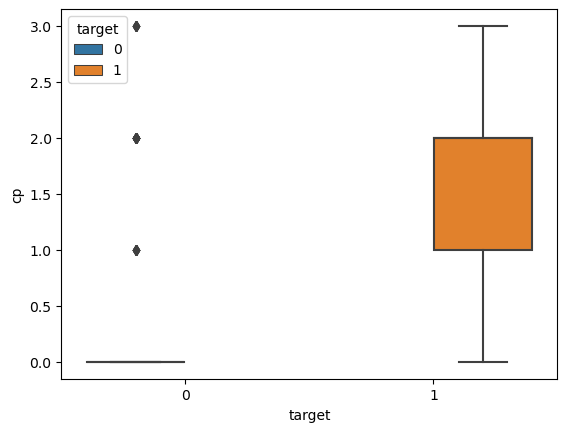

In [123]:
sns.boxplot(x="target",y="cp",hue="target",data=a)                                      #more 'cp'- withot disease
plt.show()

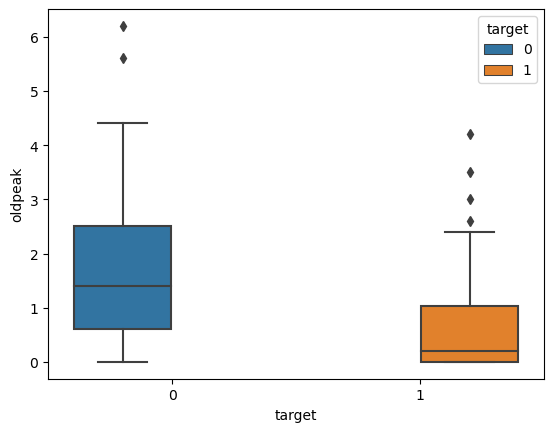

In [124]:
sns.boxplot(x="target",y="oldpeak",hue="target",data=a)                                      #more 'oldpeak'- with disease
plt.show()

In [108]:
#cp,thalach,restecg,slope-not a factor

In [17]:
x=a.iloc[:,:-1].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [52.,  1.,  0., ...,  2.,  1.,  3.],
       [59.,  1.,  3., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [18]:
y=a.iloc[:,-1:].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=13,random_state=92)

In [21]:
x_train

array([[61.,  1.,  3., ...,  1.,  2.,  2.],
       [70.,  1.,  1., ...,  2.,  0.,  2.],
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       ...,
       [58.,  1.,  2., ...,  2.,  0.,  2.],
       [42.,  1.,  0., ...,  2.,  0.,  2.],
       [52.,  1.,  3., ...,  1.,  0.,  3.]])

In [22]:
x_test

array([[ 51. ,   0. ,   0. , 130. , 305. ,   0. ,   1. , 142. ,   1. ,
          1.2,   1. ,   0. ,   3. ],
       [ 54. ,   0. ,   2. , 160. , 201. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   1. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ],
       [ 52. ,   1. ,   3. , 118. , 186. ,   0. ,   0. , 190. ,   0. ,
          0. ,   1. ,   0. ,   1. ],
       [ 51. ,   1. ,   2. ,  94. , 227. ,   0. ,   1. , 154. ,   1. ,
          0. ,   2. ,   1. ,   3. ],
       [ 51. ,   0. ,   2. , 130. , 256. ,   0. ,   0. , 149. ,   0. ,
          0.5,   2. ,   0. ,   2. ],
       [ 69. ,   1. ,   2. , 140. , 254. ,   0. ,   0. , 146. ,   0. ,
          2. ,   1. ,   3. ,   3. ],
       [ 50. ,   1. ,   2. , 129. , 196. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   0. ,   2. ],
       [ 62. ,   1. ,   0. , 120. , 267. ,   0. ,   1. ,  99. ,   1. ,
          1.8,   1. ,   2. ,   3. ],
       [ 63. ,   0. ,   1. ,

In [23]:
y_train

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [24]:
y_test

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1]], dtype=int64)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [27]:
xpred=logisticregressor.predict(x_train)
xpred

NameError: name 'logisticregressor' is not defined

In [ ]:
ypred=logisticregressor.predict(x_test)
ypred

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()
regressor

LinearRegression()

In [48]:
regressor.fit(x_train,y_train)

LinearRegression()

In [49]:
Score1=regressor.score(x_train,y_train)
Score1

0.5075511116439924

In [50]:
trainingscore1=regressor.score(x_train,y_train)
trainingscore1

0.5075511116439924

In [51]:
testingscore1=regressor.score(x_test,y_test)
testingscore1

0.7525334253319992

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logisticregressor=LogisticRegression()

In [54]:
logisticregressor.fit(x_train,y_train)

C:\Users\Shilpa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shilpa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
Score2=logisticregressor.score(x_train,y_train)
Score2

0.8477508650519031

In [56]:
trainingscore2=logisticregressor.score(x_train,y_train)
trainingscore2

0.8477508650519031

In [57]:
testingscore2=logisticregressor.score(x_test,y_test)
testingscore2

1.0

In [40]:
age=int(input("Enter age:"))
sex=int(input("Enter sex: "))
cp=int(input("Enter cp: "))
trestbps=int(input("Enter trestbps: "))
chol=int(input("Enter chol: "))
fbs=int(input("Enter fbs: "))
restecg=int(input("Enter restecg: "))
thalach=int(input("Enter thalach: "))
exang=int(input("Enter exang: "))
oldpeak=int(input("Enter oldpeak: "))
slope=int(input("Enter slope: "))
ca=int(input("Enter ca: "))
thal=int(input("Enter thal: "))
New=[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]     # creating a variable including all the above input variables
numpy=np.asarray(New)
                                           # converting into numpy array
Newarray=numpy.reshape(1,-1)
pred=regressor.predict(Newarray)
d=float(pred)
print("target",pred)


Enter age:53
Enter sex: 1
Enter cp: 0
Enter trestbps: 140
Enter chol: 213
Enter fbs: 1
Enter restecg: 0
Enter thalach: 155
Enter exang: 1
Enter oldpeak: 3
Enter slope: 0
Enter ca: 0
Enter thal: 3
target [[0.04719849]]


In [65]:
from sklearn.metrics import accuracy_score

In [67]:
trainingaccuracy=accuracy_score(xpred,y_train)
trainingaccuracy


0.8477508650519031

In [69]:
trainingaccuracy=accuracy_score(ypred,y_test)
trainingaccuracy


1.0

In [70]:
from sklearn.svm import SVR

In [71]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)

C:\Users\Shilpa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [72]:
xpred=svr.predict(x_train)
xpred

array([ 0.66922535,  0.79369773,  0.38532725,  0.03133183,  0.59321198,
        0.74675761,  0.84972062,  0.84180809,  0.06891605,  0.89101809,
        0.95412073,  0.21093893,  0.61557669,  0.09833702, -0.28198246,
        0.03633016,  1.18909869,  0.69737416,  0.93300047,  1.03681301,
        0.55768902,  1.06114742,  0.19349037,  0.70259266,  0.68170084,
        0.88281419,  1.17224941,  0.66512031,  0.86546926,  0.66456585,
        0.00712733,  0.10322354,  0.58471282,  0.33136005,  1.01480579,
        0.42610298,  1.11308805,  0.68573043,  0.98561362,  0.30726721,
        0.23689198,  0.89194945,  0.71285041,  0.94848779,  0.04332169,
        0.25269043,  0.68248168,  0.17680056,  0.91579039,  0.6110529 ,
        0.14852634,  1.03552297,  0.73616782,  0.50078617,  0.96659026,
        1.09244288,  0.79042427,  0.78736607,  0.15950832,  0.30547531,
        0.89260413, -0.11196798,  0.91882613,  0.64852766,  0.32187167,
        0.07420361, -0.14195423,  0.8298816 ,  0.3618974 ,  0.91

In [73]:
x_test

array([[ 51. ,   0. ,   0. , 130. , 305. ,   0. ,   1. , 142. ,   1. ,
          1.2,   1. ,   0. ,   3. ],
       [ 54. ,   0. ,   2. , 160. , 201. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   1. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ],
       [ 52. ,   1. ,   3. , 118. , 186. ,   0. ,   0. , 190. ,   0. ,
          0. ,   1. ,   0. ,   1. ],
       [ 51. ,   1. ,   2. ,  94. , 227. ,   0. ,   1. , 154. ,   1. ,
          0. ,   2. ,   1. ,   3. ],
       [ 51. ,   0. ,   2. , 130. , 256. ,   0. ,   0. , 149. ,   0. ,
          0.5,   2. ,   0. ,   2. ],
       [ 69. ,   1. ,   2. , 140. , 254. ,   0. ,   0. , 146. ,   0. ,
          2. ,   1. ,   3. ,   3. ],
       [ 50. ,   1. ,   2. , 129. , 196. ,   0. ,   1. , 163. ,   0. ,
          0. ,   2. ,   0. ,   2. ],
       [ 62. ,   1. ,   0. , 120. , 267. ,   0. ,   1. ,  99. ,   1. ,
          1.8,   1. ,   2. ,   3. ],
       [ 63. ,   0. ,   1. ,

In [74]:
ypred=svr.predict(x_test)
xpred

array([ 0.66922535,  0.79369773,  0.38532725,  0.03133183,  0.59321198,
        0.74675761,  0.84972062,  0.84180809,  0.06891605,  0.89101809,
        0.95412073,  0.21093893,  0.61557669,  0.09833702, -0.28198246,
        0.03633016,  1.18909869,  0.69737416,  0.93300047,  1.03681301,
        0.55768902,  1.06114742,  0.19349037,  0.70259266,  0.68170084,
        0.88281419,  1.17224941,  0.66512031,  0.86546926,  0.66456585,
        0.00712733,  0.10322354,  0.58471282,  0.33136005,  1.01480579,
        0.42610298,  1.11308805,  0.68573043,  0.98561362,  0.30726721,
        0.23689198,  0.89194945,  0.71285041,  0.94848779,  0.04332169,
        0.25269043,  0.68248168,  0.17680056,  0.91579039,  0.6110529 ,
        0.14852634,  1.03552297,  0.73616782,  0.50078617,  0.96659026,
        1.09244288,  0.79042427,  0.78736607,  0.15950832,  0.30547531,
        0.89260413, -0.11196798,  0.91882613,  0.64852766,  0.32187167,
        0.07420361, -0.14195423,  0.8298816 ,  0.3618974 ,  0.91

In [77]:
score3=svr.score(x_train,y_train)
score3

0.47436433678193646

In [78]:
trainingscore3=svr.score(x_train,y_train)
trainingscore3

0.47436433678193646

In [79]:
testingscore3=svr.score(x_test,y_test)
testingscore3

0.7313727217752439

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
polynomial=PolynomialFeatures(degree=6)

In [82]:
xpoly=polynomial.fit_transform(x)

In [83]:
regressor.fit(xpoly,y)

LinearRegression()